# Scientific Computing Coursework

In [8]:
from MyFunctions.ODE_Solve import solve_to
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] =[8,3.5]

### Part 1: Initial Value problems
**Eulers Method**: 

**Structure**: Initially there are some validation checks to determine whether the inputs provided are of the right class or make logical sense (e.g t2 < t1), then the time domain is divided into points, where $ t(i+1)-t(i) = \Delta h $. Once these variables are assigned, the initial guess 'x0' is added to an array used to store solutions; the array is used in a for loop that iterates the same number of times as there are values in the time discretised time domain. This loop uses the currently indexed solution to determine a value for the next time step using the step function, this value is then added to the array using 'vstack' to allow for an arbitrary number of dimensions. The function then returns the array of time values, and their corresponding solutions. 

The following example shows Eulers method approximating the solution to the following equation between 0-10s with a step size of 0.01: $$ {\ddot{x}} = x $$

In [10]:
# Numerical approxmation
def ode(t,y): 
    dx_dt = y[1]
    dy_dt = -y[0]
    return [dx_dt, dy_dt]
x0 = [1,1]
t,x = solve_to(ode,x0,0,10,0.01,'euler')

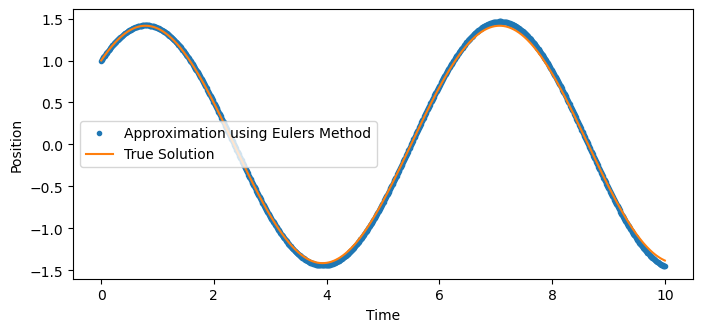

In [12]:
t,x = solve_to(ode,x0,0,10,0.01,'euler')
plt.plot(t,x[:,0],'.', label ='Approximation using Eulers Method',)
# True solution
true_solution = x0[0]*np.cos(t) + x0[1]*np.sin(t)
plt.plot(t,true_solution, label ='True Solution')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

**Discussion**: Demonstrated by the plot above, the function provides an accurate approximation to the true solution provided the step size 'h' is small enough. As h increases, the accuracy of the approximation decreases significantly. To combat this issue i implemented a value error check that raises an error when the step size is larger than a specific value i'd deemed to be a good enough approximation. The error of Eulers Method is proportional to the $ \Delta h^2 $ , so by setting the maximum limit to 0.1, I ensured the user with an error proportional to 0.01. The following design choices were made to maximise the functionality of the code whilst making it easy to understand: 
- Clear documentation describes the functions inputs, outputs and functionality making it's use easy for users to use the function.
- The function checks the validity of inputs, such as ensuring that the initial conditions are provided as a list, the time values are positive and in the correct order, and the step size is not too large.
- The function uses the euler_step function to solve a single step of the ODE, promoting modularity and reusability of code.
- The function makes use of numpy arrays to store and manipulate data, which allows for efficient computation and faster execution.
- The function returns a tuple of two arrays, representing the time values and the approximated values of the ODE, respectively. This makes it easier for users to plot or analyze the data.

**Limitations/Improvements**: The limitations of this method are rooted in the method itself; it's accuracy in comparison to other numerical approximations is significantly worse due to it's simplicity, but this isn't something I can personally develop. To improve the function further, i'd like to have implemented more rigorous tests for run time and computational complexity, but these are highly subjective dependent on various factors such as dimensionality and step size, and I believe that the approach considered and implemented along with the commands used suffice.

Overall, I think my implementation of this method provides an intuitive solution to Eulers's method, which can be used to approximate solutions to ODEs with an aribtrary number of dimensions in a relatively fast period through the combination of numpy arrays and 'for' loops. The inputs to the function are concise and of an intuitive order, the documentation provides a clear demonstration of how to format the ODE the user would like approximated, and relevant checks are performed to provide the best approximation to the solution required using Eulers Method.

**4th Order Runge-Kutta Method**: 

**Structure**: The structure of this function is very similar to that of the Euler approximation function. There are some initial checks determining whether inputs provided are valid, then the time domain is divided in the same way as before. The only difference between the two methods' strutures are the step functions, using different equations to determine the value of the approximation at the next time step.

The following example shows Runge-Kutta's method approximating the solution to the same ODE between 0-10s with a step size of 0.1:

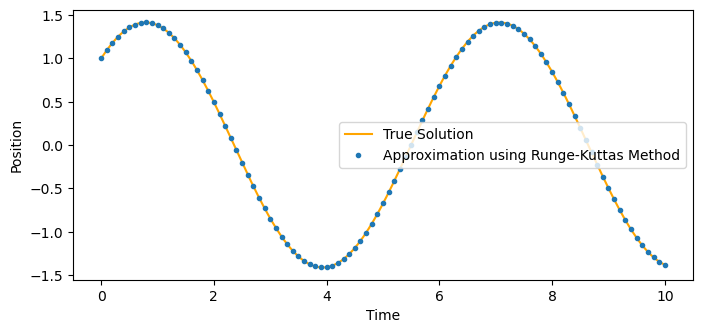

In [18]:

plt.plot(t,true_solution,color='#FFA500',label ='True Solution')
t,x = solve_to(ode,x0,0,10,0.1,'rk4')
plt.plot(t,x[:,0],'.',color='#1f77b4', label ='Approximation using Runge-Kuttas Method')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

**Discussion**: Comparing the two numerical approximations provides interesting insight into the nature of each method. Even at a step size ten times larger than the one used in the Eulers approximation, RK4 demonstrates almost an exact approximation to the true solution. I implemented the same checks used in the afformentioned method, but increased the step size threshold. The RK method is computationally more expensive than Eulers method, therefore at equivalent step sizes the runtime of RK4 is greater than Eulers method; by increasing the step size threshold it decreased the number of iterations the method completes, thus decreasing runtime.

The graph below compares the error of each method at specific step sizes for the equation: $$ y = e^t $$

![errorgraph](Error.png)

As you can see from the graph, Eulers Method has a much greater error for each of the evaluated step sizes, but the rate at which the error increases is a lot less drastic than that of the Runge-Kutta method. This is due to the error for RK4 being proportional to $ \Delta h^5 $, thus the rate at which error decreases with step size is much faster. The same design choices were implemented into the development of the RK4 method. The equivalent design choices are exhibited in this function as they are in the Eulers Method function.

The use of numpy arrays and arithmetic for both implemented methods mean that they work for an arbitrary number of dimensions. The following example, the 'Lorenz' equations, are a 3D system forming a very simple model of water starting to boil in a pot,  exhibiting the approximations' ability to cater for more than 2 dimensions:
$$
\begin{aligned}
\frac{dx}{dt} &= \sigma(y-x),
\frac{dy}{dt} &= x(\rho-z)-y,
\frac{dz}{dt} &= xy-\beta z
\end{aligned}
$$

In [19]:
def Lorenz(t,xyz,s,r,b):
    x,y,z = xyz
    dx_dt = s*(y-x)
    dy_dt = r*x - y - x*z
    dz_dt = x*y - b*z
    return [dx_dt,dy_dt,dz_dt]

t,x= solve_to(Lorenz,[0,1,1.05],0,50,0.01,'rk4',3,26.5,1)

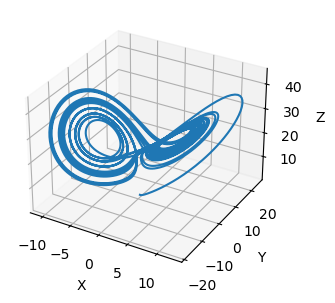

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot(x[:,0], x[:,1], x[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

**Limitations/Improvements**: Again, I think my implementation of the RK4 method is a sufficient interpretation of how to solve the problem. It provides accurate approximations to arbitrary ODE's of any dimension in a relatively fast period. I think more rigorous testing may have been appropriate to determine any bugs present in the function, but since using it no issues have arised. Also, a more concise documentation could prevent any confusion for the user, but I believe the more extensive description is a good way of making the function as easy to understand as it can be.

### Part 2: Numerical Shooting
My Numerical Shooting function takes the following inputs: An initial guess to the starting conditions of a periodic orbit, the ODE being solved, and any external arguments the ODE requires. This allows the user to easily alter any arbitrary values that may change the characteristics of any periodic orbits.

**Structure**: To return the true values of the periodic orbit, I first defined a function within the shooting function containing the appropriate phase conditions that a periodic orbit requires. This inner function is solved using scipy's 'root', and the corresponding values are returned to the user describing the starting conditions of the periodic orbit depending on whether 'root' converges to a solution. The code below plots the solution of the 'Predator-Prey' model using the numerical approximation methods implemented in part 1:

In [4]:
from MyFunctions.ODE_Solve import shooting
def ode(t,y,a,b,d): 
    x = y[0]
    y = y[1]
    dx_dt = x*(1-x) - (a*x*y)/(d+x) 
    dy_dt = b*y*(1-(y/x))
    return [dx_dt, dy_dt] 
a = 1
b = 0.2
d = 0.1
x0 = [1,2]
t,x = solve_to(ode,x0,0,30,0.001,'rk4',a,b,d)

By varying the value of the 'b' parameter, the conditions for the periodic orbit change. A value for 'b' greater than 0.26 mean that the system never converges to a stable periodic orbit and therefore the conditions required for numerical shooting are never satisfied. I implemented a value check into the shooting function that raises an error when these conditions are not met to stop the function iterating forever. The period and initial values of the orbit displayed in the above figure are exhibited below using my 'shooting' function:

In [5]:
guess = [20,x0[0],x0[1]]
y = shooting(guess,ode,a,b,d)
print(type(y))

<class 'numpy.ndarray'>


Using the values provided by the shooting function as initial conditions for our numerical approximation methods means we can plot the phase portrait of the periodic orbit, exhibited below for the 'Predator-Prey' model:

In [23]:
x0 = [y[1],y[2]]
t2 = y[0]
t,x = solve_to(ode,x0,0,t2,0.01,'euler',a,b,d)

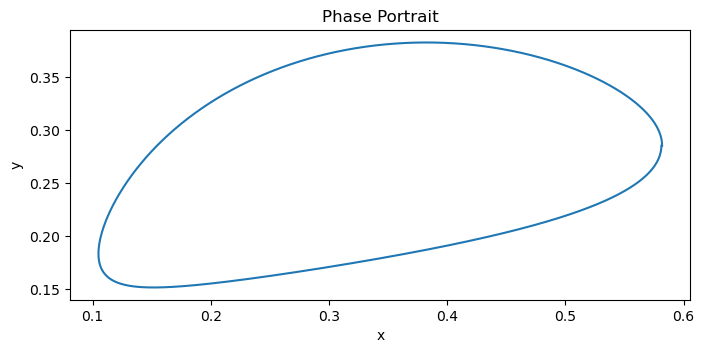

In [24]:
plt.plot(x[:,0],x[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')
plt.show()

**Discussion**: My Numerical Shooting function provides an intuitive solution to determining the phase conditions for periodic orbit of arbitrary ODE's, providing a periodic orbit exists. The following design choices were made to maximise the intuitivity and flexibility of the function, whilst retaining accuracy and minimising computational expense where possible. 
- Clear documentation describes the functions inputs, outputs and functionality making it's use easy for users to use the function.
- The use of nested functions makes the code more modular, and helps encapsulate the implementation details of the Numerical Shooting method.
- The function takes the '*args' parameter, increasing it's flexibility for handling multiple a wider range of differential equations.
- The function raises a ValueError if the method fails to find the initial values of the limit cycle. This helps to prevent the function from returning incorrect results or crashing if the input parameters are invalid.
- The function uses the solve_ivp function from the SciPy library, rather than the approximate methods defined in part 1 to numerically solve the differential equation. This makes it possible to find the limit cycle of nonlinear and complex systems that cannot be solved analytically.
- The use of numpy arrays means that an arbitrary number of dimensions can be solved for.

These design choices help make the function more robust, modular and flexible.

**Limitations/Improvements**:


### Part 3: Numerical Continuation

**Overview**: Numerical Continuation methods are used to capture parameter dependent behavior. The resulting graphs produced describe the solution of the equation between a range of arbitrary parameter values, this can be a useful tool for determining bifurcation points and determining the stability of certain equilibria.

**Parameter Continuation**:

**Structure**: My Parameter Continuation function initially defines the two seperate methods for continuation, Natural Parameter and Pseudo Arc-length continuation. The natural continuation function makes use of a for loop containing scipy's 'root' function. The root function uses the previous guess as an initial guess for the root finding, the solutions are then appended to an array along with the corresponding parameter value, dependent on the solutions '.success' attribute. The Pseudo Arc-length function uses the first two values obtained from the natural parameter continuation function as the two known solutions. It then uses various numpy functions to perform the necessary calculations used to determine the variables needed for the method. These variables are then passed to a subfunction which formulates the Pseudo arc-length equations as a system, for which scipys 'root' function solves. These solutions are then appended to an array dependent on their success. This function makes use of a while loop to determine the solutions within the parameter range. After these two methods' definitions, the function passes each input through some value checks to ensure viable inputs are passed to the function.

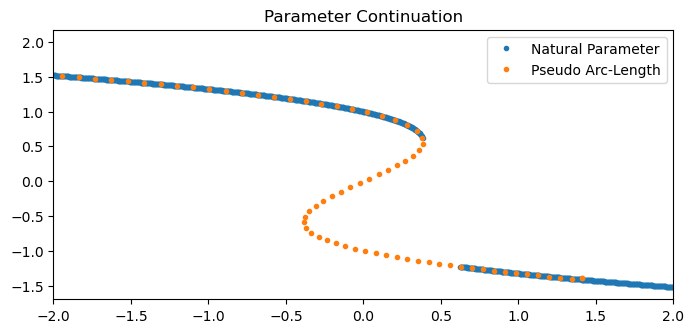

In [47]:
from MyFunctions.ODE_Solve import Continuation
def function(x,c):
    return x**3-x+c
x,y = Continuation(function,2,-2,2,'natural')
x1,y1 = Continuation(function,-10,-2,2,'pseudo')
plt.plot(x,y,'.',label='Natural Parameter')
plt.plot(y1,x1,'.',label='Pseudo Arc-Length')
plt.xlim(-2,2)
plt.legend()
plt.title('Parameter Continuation')
plt.show()

**Discussion**: Both methods work as they're intended to. The Natural Parameter method fails as the system reaches a fold, whereas the Pseudo Arc-length method manages to capture the behaviour of the parameter dependent system fully. Although the methods both work, the Pseudo function could definitely have been written more concisely. I struggled to formulate a more efficient way of writing this function but was just happy to see it working correctly. Although continuation works for this particular example, it's success is very dependent on the initial guess provided by the user which I can imagine would lead to a lot of misleading solutions if this value was wrong initially. Having said this, I implemented the following design choices into the function to increase its useability:
- Clear documentation provides the user with intuitive instructionsfor using the function.
- The use of scipy's 'root' function means that with the '.success' command, any incorrect solutions aren't wrongly assigned to the solution array, increasing the accuracy of the method.
- The use of subfunctions increases the whole functions modularity, this is useful for understanding the flow of information through the function.

**Limitations/Improvements**: I am aware that this function is very limited in its capabilities. It's constrained to only one independent variable and one variable parameter, and each solution is highly dependent on the initial guess provided by the user. As mentioned before, the Pseudo Arc-length subfunction could've been written in a more concise manner, and used more generalised functions to account for equations with more dimensions. I did struggle a lot with the development of these functions, my knowledge of bifurcation diagrams is stronger than most of the areas my functions were developed for, so this did surprise me.

I struggled when it came to systems with more dimensions using scipys 'root', for instance the Hopf normal form's equilibria can always equal zero for each variable, no matter the parameter values, thus this was the only solution being found with my function. This led to development becoming very frustrating. It would've been very interesting to experiment with continutation on the PDE's below, and I feel like it'd have aided my understanding of their solutions which would've made writing the functions easier. Overall, I'm glad I managed to develop the function, but frustrated with the level I managed to develop it to. 

### Part 4: Partial Differential Equations (PDE's)

**Finite Difference Method**: 

**Structure**: I tool a modular approach to the structure of my Finite Difference solver; I defined three sub-functions which solve the system for the respective boundary conditions, these solve the system using another subfunction called 'SolveSource'. The 'SolveSource' function makes use of a for loop to cycle through the discretised space, updating the system at each point in the grid. The function then uses scipys 'root' to determine the solution of the system. After these subfunctions are defined, the solver runs some input checks, raising errors for any invalid inputs. The function then passes the inputs to the respective subfunction dependent on the 'bc_type' variable for which the solution is then returned along with the corresponding gridpoints.

In [13]:
from MyFunctions.PDE_Solve import ExplicitEuler,RKSolver,ImplicitEuler,CrankNicolson,CreateAandb,FiniteDifference, SolvePDE
plt.rcParams['figure.figsize'] =[5,4]

def source(x,f):
    return np.ones(np.size(x))
x,y = FiniteDifference(source,1,20,'dirichlet',0.0,0.0)


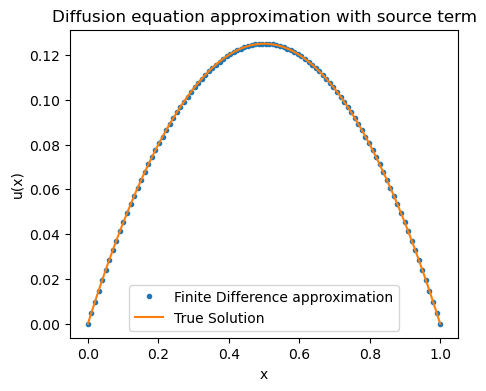

In [18]:
plt.plot(x,y,'.',label='Finite Difference approximation')

x = np.linspace(0,1,100)
y = (-1/2)*(x)*(x-1)
plt.plot(x,y,label='True Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Diffusion equation approximation with source term')
plt.legend()
plt.show()

**Discussion**: The function provides accurate Finite Difference approximations to the exact solutions of the diffusion equation, but does lack the flexibility that a higher level solver may possess.  The function is capable of approximating solutions to ODE's of the form: $$ D\frac{d^2u}{dx^2} + q(x,u,\mu) = 0 $$ I feel as though a more in depth understanding of the Finite Difference method would've aided the development of a more modular and refined function, as I struggled to think of/ develop a better way of defining all of the parameters to pass to the function. The following design choices were made to increase the functions useability and flexibility whilst retaining modularity and robustness:
- The use of subfunctions increases the solvers modularity, which aids flexibility and makes editing easier .
- Clear documentation provides the user with the necessary information needed to use the function 
- The use of functions from other modules such as scipy's 'root' and numpy's 'linspace' aids flexibility for solving a wide range of problems in a short time-frame.
- Numerous value error checks performed on inputs. This increases the robustness of the function leading to a minimal number of errors with solutions.
- Clear variable names ensure that the flow of data through the function is easy to understand, making debugging and understanding errors easier to understand and rectify.

**Limitations/Improvements**: This was the first method for approximating PDE's I attempted. The function is limited in a few ways. Firstly, the function doesn't account for any initial condition. I'd be able to implement this feature fairly easily, but during the initial coding of the function I wasn't as familiar as I am now with PDE's, thus didnt include it. The implementation of continuation with this function would provide useful insight into the analysis of solutions, but unfortunately my continuation function only works with one variable, thus is incompatible. The function could also benefit from some comments to aid readibility. Overall, I think the function works well, but definitely has room for improvement which would be implemented now if it was rewritten. 

**Explicit Euler Method**: 

**Structure**: To return the values of the Diffusion equation within a given spatial domain for a timespan zero to a final time 't_final', I structured Explicit Euler function in the following way: Initially I ran some checks on the inputs, raising value errors for any incorrectly formatted variables passed to the function. I then discretised both spatial and time domains using numpy's 'linspace' and 'arange' functions respectively so that i'd be able to use a nested for loop to iterate through each domain, updating the solutions at each step. Once the important variables were defined, the function initialise the solution array with zeros, and replaces the first row with any initial condition specified externally. The function then iterates through both domains, updating the solution using the relevent formulae at each step.
The following example shocases the functions ability to solve the 'Bratu' problem, with an external parameter $\mu = 2$. 

In [36]:
def f(x):
    return np.zeros(np.size(x))# Defining the initial condition
def source(x,t,u,mu=2):
    return np.exp(mu*u)
x,y = ExplicitEuler(50,0,1,1,1,0.00001,0.0,0.0,f,source)

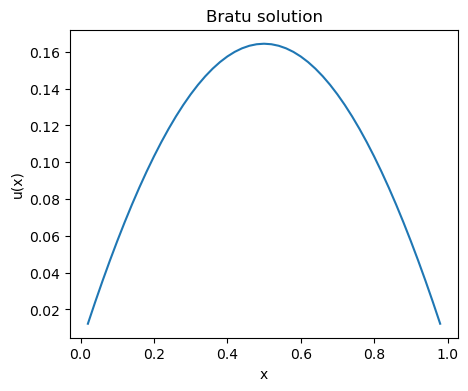

In [37]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Bratu solution')
plt.show()

**Discussion**: This function provides an accurate approximation to the Diffusion equation with homogeneous Dirichlet boundary conditions. The implementation of this method does come with difficulties; the value 'C' defined in the equations above is a key attribute to whether this function provides any sort of accurate approximation. To ensure stability $ C < \frac{1}{2} $ must be satisfied. To eliminate this from happening, I implemented a value error check for the 'C' variable to ensure the functions stability. 

This method, after the Numerical Continuation problems proved the most difficult for me to solve, hence the lack of other boundary condition implementation. I found that in subsequent tasks, understanding and using the matrix-vector formulation made creating the functions for other methods a lot more straight forward; doing this for the Explicit Euler method would have eliminated the need for the nested loop, potentially decreasing computational complexity, plus the implementation of different boundary condition types would've been more intuitive. Having said this, the following design choices were made to make my Explicit Euler method's application to maximise accuracy and flexibility for the user:

- Clear variable names and documentation to make passing any inputs to the function as simple and intuitive as possible.
- The function separates the initial condition, boundary conditions, and source term into separate functions making it easier to modify these components without affecting the rest of the code.
- The function takes in a large range of inputs, including arbitrary source and initial condition terms, the former being dependent on the spatial variable, time component and solution component, plus any variables the user wishes to pass to the source term. This enables a wide range of problems to be solved.

**Limitations/Improvements**:
Providing I had more time to develop this function, I'd implement the use of matrix vector notation to enable the user to pass other variations of boundary condition and increase efficiency, define more error handling checks to increase the robustness of the function, and implement a parameter continuation function to track the changes in the solution as an arbitrary parameter changes in the source term. Having discussed the limitations and improvements that could have been made to the function, I believe that the function is still a solid implementation of the method for the tasks that it can solve.

**Runge-Kutta compatibility (Method of Lines)**: To again test the flexibility and robustness of my ODE solvers, I created a function using the matrix-vector formulations to transform the discretised Diffusion equation into a set of ODE's using the Method of Lines. Using a function, 'CreateAandb', to generate the respective matrices for each boundary condition type, I defined a sub-function formulating the problem into the afformentioned system of ODE's and passed it to my Runge-Kutta method solver. The results are as follows:

In [20]:
a = 0
b = 1
def q_func(t,x,u):
    return 0
def IC(x):
    return np.sin((np.pi*(x-a))/(b-a))
x,y,t = RKSolver(50,a,b,1,1,0.1,'dirichlet',0.0,0.0,IC,q_func)

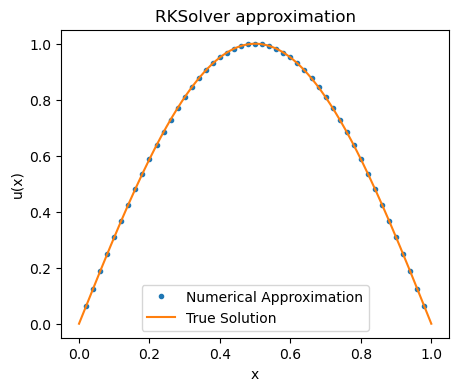

In [21]:
plt.plot(x,y,'.',label='Numerical Approximation')
x1 = np.linspace(a,b,1000)
t1 = 0
def true_solution(x, t):
    return np.exp(-(0.1*np.pi**2*t)/(b-a)**2) * np.sin((np.pi*(x-a))/(b-a))

u_true = true_solution(x1, t1)
plt.plot(x1, u_true,label='True Solution')
plt.legend()
plt.title('RKSolver approximation')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.show()

**Implicit Euler Method**: 

**Structure**: I began by defining three seperate sub-functions within the function to account for the different types of boundary condition to be applied. These three functions use the respective matrix-vector formulation functions I created in order to return the corresponding A and b matrices, the interior gridpoints and $ \Delta x $. These variables are then used within each of the three functions to return the interior gridpoints, and the corresponding solution. After these functions' definition, the code runs numerous input checks to ensure no invalid inputs can be passed to the three functions previously defined. After these checks are complete, multiple 'if' statements pass the corresponding inputs dependent on the 'bc_type' variable, where the accepted inputs are either 'dirichlet', 'neumann' or 'robin'. If the 'bc_type' variable is invalid, the function raises a value error defining the accepted inputs. The function returns the solution at time t_final, and the interior gridpoints corresponding to the solutions.

In [40]:
def source(x,t,u,r):
    return r*u*(1-u)
def IC(x):
    return 0
x,y = ImplicitEuler(200,-10,10,0.1,20,0.001,'neumann',1.0,0.0,'none',source,2)

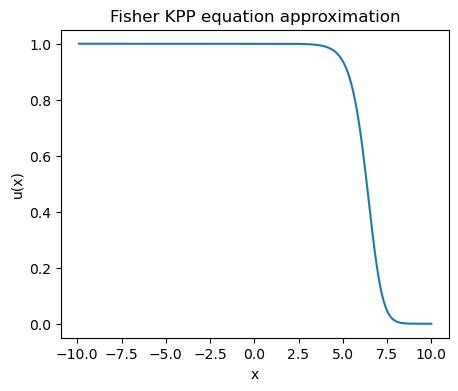

In [41]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Fisher KPP equation approximation')
plt.show()

**Discussion**: The above example displays the functions ability to solve a various number of complex problems with the inclusion of non-homogeneous boundary conditions. The example is the Fisher-KPP equation, a reaction-diffusion equation that describes the spread of population in space and time. The function makes use of the matrix vector notation, which allowed me to experiment and test my function with more difficult problems. I believe that this implementation of the Implicit Euler method is a very solid function, the following design choices were made to maximise both modularity and flexibility whilst retaining computational efficiency:
- Each type of boundary condition is implemented in a seperate function, this allows for increased modularity and flexibility to minmise computational expense and increase the ease of modification if needed.
- The use of matrix vector formulation and numpy functions minimise computational time and maxmise performance
- Clear and concise documentation describes the accepted inputs to the function in an intuitive fashion. This increases the functions useability and should provide the user with an explanation to any errors concerning invalid inputs passed.
- The function implements numerous validation checks for each input, raising value/type errors for incorrect inputs. These checks ensure that minimal output errors occur when the user passes their problem to the function.

**Limitations/Improvements**: As stated before, I do believe that this implementation of the method is very robust, having said this, there are always improvements that can be made. I could have tested the function more rigorously in order to determine any errors a user may run into, and write the corresponding checks in order to eliminate these occuring. The function does not have the ability to solve for time dependent boundary conditions, I think a better understanding of partial differential equations and the types of boundary conditions that are applicable to them would definitely aid this features development. Overall though, I think that the understanding of the matrix vector notation at this stage made developing the remaining software a lot easier.

**Crank-Nicolson Method**:

**Structure**: Having used a more modular design in the previous method, I used the same approach here. Initially I defined three sub-functions, producing the corresponding matrix-vector formulations of the respective boundary condition solutions with the users inputs. The function then runs an extensive list of input validation checks to eliminate the possibility of errors. After these checks are completed, the 'bc_type' variable is passed to a set of 'if' statements to determine which sub-function the users inputs are passed to in order to produce the corresponding solution. The subfunctions call the respective 'CreateAandb' functions, then loop the system over t, solving the system at each step using numpys 'linalg.solve' function. The function then returns the internal gridpoints, and their solutions. Below is a demonstration of it's use:

In [56]:
def source(x,t,u):
    return u-u**3
def IC(x):
    return np.random.uniform(-0.001,0.001,np.size(x))
x,y = CrankNicolson(200,0,1,0.01**2,50,0.1,'neumann',0.0,0.0,IC,source)

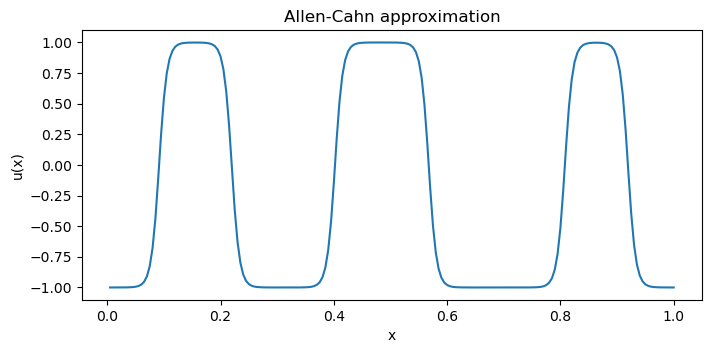

In [57]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Allen-Cahn approximation')
plt.show()

**Discussion**: My implementation of the Crank-Niclolson method provides a straight forward, modular approach to the solution. By combining multiple sub-functions within the function, I was able to implement the method quite intuitively. The function again makes use of matrix-vector notation to decrease computational expense and increase efficiency, plus the modular approach divides the function into manageable sections for flexibility and debugging. These are the design choices I made along with their reasoning:
- The use of sub-functions maximises the modularity of the application. This modularity makes the code easier to understand, and allows for easier modification should the function need it.
- The clear documentation provided gives a clear and concise description of any variables/parameters that the user may pass to the function. This clear description minimises any confusion the user may encounter when trying to use the function.
- The function has many inputs. This increases the flexibility of the function, with the ability to pass arbitrary source and initial condition functions, domain limits, time domains, discretisation points, time step, and boundary conditions. This enables the function to solve a wide variety of problems, including all previously exhibited.
- The use of matrix-vector notation increases the computational efficiency and increases the readability of the code.
- The extensive list of input checks minimises the chance of errors with solutions concerning incorrect inputs.

**Limitations/Improvements**: The function provides an accurate approximation to a wide range of PDE problems. The limitations of the function are the following; the function only returns the value of the solution at time 't_final', this is obviously useful, but for more in depth analysis to track how solutions change over time, the function could return the whole array of solutions. This would also have been useful if i'd managed to create a working numerical continuation function, for which the user could track how a solution changes dependent on a parameter, giving useful insight for bifurcation analysis. This wouldn't be difficult to implement, as i'd just have to remove the indexing of the returned solution

**Final Solver**: Combining these later functions, with the ability to account for all types of boundary condition, solution dependent source terms, and an initial condition leads to the following function. An intuitive, modular and efficient numerical approximator used for solving the Diffusion equation with solution, time and spatial dependent source terms. It can be called in the following way:

In [ ]:
from MyFunctions.PDE_Solve import SolvePDE
x,y = SolvePDE(Method,N,domain_start,domain_end,D,t_final,dt,bc_type,bc_left,bc_right,initial_condition,source,*args)

### Reflective Learning Log

Reflecting on the software I've developed, I think it illustrates an interesting narrative with how I've learnt how to develop code to a higher level. The level of modularity and conciseness exhibited in the later weeks' tasks is to a far greater level than that at the start of the course, specifically in the PDE's section. I've learnt how to progressively build a function in manageable sections, recognise and rectify bugs and errors efficiently and understand the dynamics of the diffusion equation and other PDE's to a much greater level to name a few. The main learning curves I encountered during the course were firstly, understanding how to formulate a system of equations effectively to turn problems into root finding problems, and understanding Matrix-Vector formulation. Understanding how to use Matrix-Vector formulation significantly boosted the level of modularity exhibited in the later functions, and the code testing helped me guage what each part of my code specifically equates to. 


I purposely left out further developments to the earlier functions, merely to show the level at which my code development has increased. Admittedly, I think I did get lucky with the commands I used in the numerical solvers, as I felt that integrating the discretised PDE systems with these methods went a lot smoother than it could've. It surprised me because I've also learnt how frustrating software development can be, having spent weeks trying to figure out the issues with my continuation code. I'm glad I had this issue in hindsight. It enabled me to really understand how important debugging is for future developments, where something can look right, and even produce correct plots, but internally running into issues which impact how robust the function actually is compared to how it seems. This lesson definitely aided my ability to diagnose problems with my functions and fix them correctly, rather than just getting them to work for specific examples.

In conclusion, this course has drastically increased my coding understanding, and therefore ability. It has also aided my interpretation of ODE and PDE solutions, and the numerical methods we can use to approximate them. I've definitely learned valuable lessons that are applicable accross all areas of software development which will now be unconsciously applied having spent so much time learning them. 